In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["svg.fonttype"] = "none"

In [2]:
df = pd.read_csv("output.csv")
df.describe()

,frame,distance_m,min_azimuth_deg,max_azimuth_deg,min_altitude_deg,max_altitude_deg,min_distance_m,max_distance_m,height,width,length,center_x,center_y,center_z,yaw_rad,points_count
count,40570.000000,40570.000000,40570.000000,40570.000000,40570.000000,40570.000000,40570.000000,40570.000000,40570.000000,40570.000000,40570.000000,40570.000000,40570.000000,40570.000000,40570.000000,40570.000000
mean,3745.900099,29.523035,0.349493,6.917663,88.523277,92.972157,26.780119,28.930232,1.688902,1.528661,3.845704,28.190472,2.048284,-1.391330,-0.007033,431.475228
std,2144.109422,17.448112,20.861704,20.812059,12.100331,13.532669,16.944107,16.569554,0.440083,0.456467,2.379170,17.432736,8.435665,0.391436,1.952638,1379.834738
min,0.000000,2.990000,-151.905000,-44.695000,0.000000,0.000000,0.000000,0.000000,0.760000,0.300000,0.200000,-3.290000,-39.586000,-5.009000,-3.141000,0.000000
25%,1896.000000,15.697750,-10.070750,-6.245750,89.512000,91.542000,13.388500,16.021000,1.460000,1.520000,3.360000,14.478000,-2.955000,-1.616000,-1.501000,25.000000
50%,3753.000000,26.110500,2.936500,5.069000,90.199500,93.039000,23.655500,26.123500,1.560000,1.620000,3.830000,24.833500,2.633000,-1.460000,-0.001000,83.000000
75%,5588.000000,40.194500,14.073000,19.668000,90.810000,95.853000,37.269000,39.195750,1.750000,1.710000,4.260000,38.587250,6.482000,-1.230000,1.539000,313.000000
max,7480.000000,149.798000,48.765000,168.750000,100.918000,113.787000,79.921000,79.990000,4.200000,3.010000,35.240000,146.945000,44.427000,2.729000,3.132000,42664.000000


<Axes: xlabel='type'>

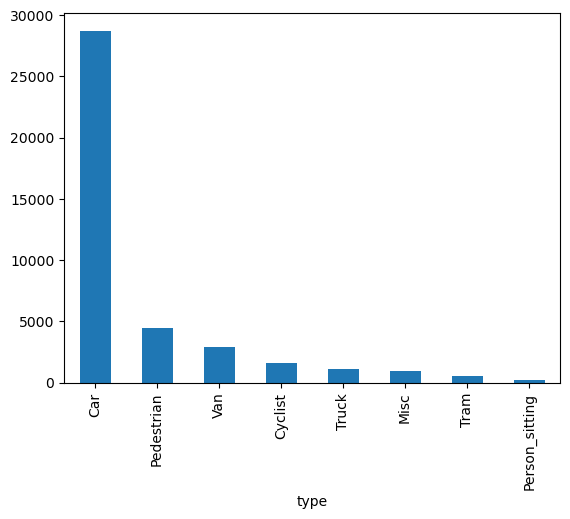

In [3]:
# typeを集計する
df["type"].value_counts().plot.bar()

<Axes: xlabel='distance_m', ylabel='points_count'>

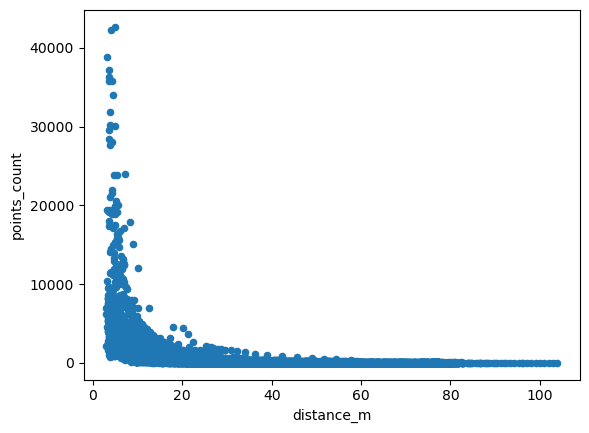

In [4]:
# Car, Van, Truckについて、横軸をdistance_m、縦軸をpoints_countとして散布図を描く
df_vehicle = df[df["type"].isin(["Car", "Van", "Truck"])]
df_vehicle.plot.scatter(x="distance_m", y="points_count")

In [5]:
# Pedestrianについて、azimuthとaltitudeの差分を取る
df_pedestrian = df[df["type"] == "Pedestrian"]
df_pedestrian["azimuth_range"] = df_pedestrian["max_azimuth_deg"] - df_pedestrian["min_azimuth_deg"]
df_pedestrian["altitude_range"] = df_pedestrian["max_altitude_deg"] - df_pedestrian["min_altitude_deg"]

hist = pd.cut(df_pedestrian["azimuth_range"], bins=np.arange(0, 21, 1), right=False).value_counts().sort_index()
accum = hist.cumsum()
accum_rate = accum / accum.max()
# print(accum_rate.index)
print("All Pedestrians")
print(f"5deg = {accum_rate[5]}")
print(f"10deg = {accum_rate[10]}")
print(f"15deg = {accum_rate[15]}")
#print(f"20deg = {accum_rate[20]}")
# plt.plot(np.arange(0, 20, 1), accum_rate.values)
# for i, v in enumerate(accum_rate.values):
#     plt.text(i, v, str(round(v, 3)))
# plt.xlabel("azimuth_range(deg)")
# plt.ylabel("accum_rate")
# plt.title("azimuth_range(Pedestrian)")
# plt.show()

df_pedestrian_20m = df_pedestrian[df_pedestrian["distance_m"] < 20]
hist = pd.cut(df_pedestrian_20m["azimuth_range"], bins=np.arange(0, 21, 1), right=False).value_counts().sort_index()
accum = hist.cumsum()
accum_rate = accum / accum.max()
# print(accum_rate.index)
print("Pedestrians within 20m")
print(f"5deg = {accum_rate[5]}")
print(f"10deg = {accum_rate[10]}")
print(f"15deg = {accum_rate[15]}")
#print(f"20deg = {accum_rate[20]}")
# plt.plot(np.arange(0, 20, 1), accum_rate.values)
# for i, v in enumerate(accum_rate.values):
#     plt.text(i, v, str(round(v, 3)))
# plt.xlabel("azimuth_range(deg)")
# plt.ylabel("accum_rate")
# plt.title("azimuth_range(Pedestrian)")
# plt.show()

# # それぞれのヒストグラムを描く
# plt.hist(df_pedestrian["azimuth_range"], bins=20)
# plt.title("azimuth_range")
# plt.show()
# plt.hist(df_pedestrian["altitude_range"], bins=20)
# plt.title("altitude_range")
# plt.show()

# # それぞれの散布図を描く
# plt.scatter(df_pedestrian["distance_m"], df_pedestrian["azimuth_range"])
# plt.xlabel("distance(m)")
# plt.ylabel("azimuth_range(deg)")
# plt.title("azimuth_range(Pedestrian)")
# plt.show()

# plt.scatter(df_pedestrian["distance_m"], df_pedestrian["altitude_range"])
# plt.xlabel("distance(m)")
# plt.ylabel("altitude_range(deg)")
# plt.title("altitude_range(Pedestrian)")
# plt.show()

All Pedestrians
5deg = 0.9451749498551371
10deg = 0.9973256073100066
15deg = 1.0
Pedestrians within 20m
5deg = 0.9151138716356108
10deg = 0.9958592132505176
15deg = 1.0


C:\Users\hykwy\AppData\Local\Temp\ipykernel_8624\367315968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pedestrian["azimuth_range"] = df_pedestrian["max_azimuth_deg"] - df_pedestrian["min_azimuth_deg"]
C:\Users\hykwy\AppData\Local\Temp\ipykernel_8624\367315968.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pedestrian["altitude_range"] = df_pedestrian["max_altitude_deg"] - df_pedestrian["min_altitude_deg"]


In [19]:
# Car, Van, Truckをあわせたものについて、azimuthとaltitudeの差分を取る
df_vehicle = df[df["type"].isin(["Car", "Van", "Truck"])]
df_vehicle["azimuth_range"] = df_vehicle["max_azimuth_deg"] - df_vehicle["min_azimuth_deg"]
df_vehicle["altitude_range"] = df_vehicle["max_altitude_deg"] - df_vehicle["min_altitude_deg"]

print("azimuth")
for distance in range(1, 10):
    df_vehicle_distance = df_vehicle[df_vehicle["distance_m"] >= distance]
    under_20deg_count = len(df_vehicle_distance[df_vehicle_distance["azimuth_range"] < 20])
    all_count = len(df_vehicle_distance)
    print(f"{distance}m: {under_20deg_count} / {all_count} = {under_20deg_count/all_count}")

print("altitude")
for distance in range(1, 10):
    df_vehicle_distance = df_vehicle[df_vehicle["distance_m"] >= distance]
    under_20deg_count = len(df_vehicle_distance[df_vehicle_distance["altitude_range"] < 16])
    all_count = len(df_vehicle_distance)
    print(f"{distance}m: {under_20deg_count} / {all_count} = {under_20deg_count/all_count}")

azimuth
1m: 30407 / 32750 = 0.9284580152671755
2m: 30407 / 32750 = 0.9284580152671755
3m: 30407 / 32748 = 0.9285147184560889
4m: 30407 / 32610 = 0.9324440355719105
5m: 30407 / 32292 = 0.9416264090177133
6m: 30407 / 31835 = 0.955143709753416
7m: 30390 / 31377 = 0.968543837843006
8m: 30260 / 30871 = 0.9802079621651388
9m: 29960 / 30337 = 0.9875729307446353
altitude
1m: 31343 / 32750 = 0.9570381679389313
2m: 31343 / 32750 = 0.9570381679389313
3m: 31343 / 32748 = 0.9570966165872725
4m: 31339 / 32610 = 0.9610242256976388
5m: 31338 / 32292 = 0.9704570791527313
6m: 31338 / 31835 = 0.984388251923983
7m: 31236 / 31377 = 0.9955062625490009
8m: 30831 / 30871 = 0.9987042855754592
9m: 30320 / 30337 = 0.9994396281768138


C:\Users\hykwy\AppData\Local\Temp\ipykernel_8624\138025622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle["azimuth_range"] = df_vehicle["max_azimuth_deg"] - df_vehicle["min_azimuth_deg"]
C:\Users\hykwy\AppData\Local\Temp\ipykernel_8624\138025622.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle["altitude_range"] = df_vehicle["max_altitude_deg"] - df_vehicle["min_altitude_deg"]


In [6]:
# Car, Van, Truckをあわせたものについて、azimuthとaltitudeの差分を取る
df_vehicle = df[df["type"].isin(["Car", "Van", "Truck"])]
df_vehicle["azimuth_range"] = df_vehicle["max_azimuth_deg"] - df_vehicle["min_azimuth_deg"]
df_vehicle["altitude_range"] = df_vehicle["max_altitude_deg"] - df_vehicle["min_altitude_deg"]

hist = pd.cut(df_vehicle["azimuth_range"], bins=np.arange(0, 181, 1), right=False).value_counts().sort_index()
accum = hist.cumsum()
accum_rate = accum / accum.max()
print("All Vehicles")
print(f"10deg: {accum_rate[10]}")
print(f"20deg: {accum_rate[20]}")
print(f"30deg: {accum_rate[30]}")
print(f"40deg: {accum_rate[40]}")
# plt.plot(np.arange(0, 180, 1), accum_rate.values)
# for i, v in enumerate(accum_rate.values):
#     plt.text(i, v, str(round(v, 3)))
# plt.xlabel("azimuth_range(deg)")
# plt.ylabel("accum_rate")
# plt.title("azimuth_range(Car, Van, Truck)")
# plt.show()

df_vehicle_20m = df_vehicle[df_vehicle["distance_m"] < 20]
hist = pd.cut(df_vehicle_20m["azimuth_range"], bins=np.arange(0, 181, 1), right=False).value_counts().sort_index()
accum = hist.cumsum()
accum_rate = accum / accum.max()
print("Vehicles within 20m")
print(f"10deg: {accum_rate[10]}")
print(f"20deg: {accum_rate[20]}")
print(f"30deg: {accum_rate[30]}")
print(f"40deg: {accum_rate[40]}")

df_vehicle_over_10m = df_vehicle[df_vehicle["distance_m"] > 10]
hist = pd.cut(df_vehicle_over_10m["azimuth_range"], bins=np.arange(0, 181, 1), right=False).value_counts().sort_index()
accum = hist.cumsum()
accum_rate = accum / accum.max()
print("Vehicles over 10m")
print(f"10deg: {accum_rate[10]}")
print(f"20deg: {accum_rate[20]}")
print(f"30deg: {accum_rate[30]}")
print(f"40deg: {accum_rate[40]}")
# plt.plot(np.arange(0, 180, 1), accum_rate.values)
# for i, v in enumerate(accum_rate.values):
#     plt.text(i, v, str(round(v, 3)))
# plt.xlabel("azimuth_range(deg)")
# plt.ylabel("accum_rate")
# plt.title("azimuth_range(Car, Van, Truck) < 20m")
# plt.show()

# # それぞれのヒストグラムを描く
# plt.hist(df_vehicle["azimuth_range"], bins=20)
# plt.title("azimuth_range")
# plt.show()
# plt.hist(df_vehicle["altitude_range"], bins=20)
# plt.title("altitude_range")
# plt.show()

# # それぞれの散布図を描く
# plt.scatter(df_vehicle["distance_m"], df_vehicle["azimuth_range"])
# plt.xlabel("distance(m)")
# plt.ylabel("azimuth_range(deg)")
# plt.title("azimuth_range(Car, Van, Truck)")
# plt.show()

# plt.scatter(df_vehicle["distance_m"], df_vehicle["altitude_range"])
# plt.xlabel("distance(m)")
# plt.ylabel("altitude_range(deg)")
# plt.title("altitude_range(Car, Van, Truck)")
# plt.show()

All Vehicles
10deg: 0.8147786259541985
20deg: 0.9344732824427481
30deg: 0.9652824427480916
40deg: 0.9804885496183207
Vehicles within 20m
10deg: 0.4270080125073285
20deg: 0.7918702364666796
30deg: 0.8891928864569083
40deg: 0.9376587844440102
Vehicles over 10m
10deg: 0.8979358184328383
20deg: 0.9953530659662592
30deg: 0.9994612250395662
40deg: 0.9997979593898374


C:\Users\hykwy\AppData\Local\Temp\ipykernel_8624\3113039397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle["azimuth_range"] = df_vehicle["max_azimuth_deg"] - df_vehicle["min_azimuth_deg"]
C:\Users\hykwy\AppData\Local\Temp\ipykernel_8624\3113039397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle["altitude_range"] = df_vehicle["max_altitude_deg"] - df_vehicle["min_altitude_deg"]


C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\740568791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pedestrian["azimuth_range"] = df_pedestrian["max_azimuth_deg"] - df_pedestrian["min_azimuth_deg"]
C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\740568791.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pedestrian["altitude_range"] = df_pedestrian["max_altitude_deg"] - df_pedestrian["min_altitude_deg"]
C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\740568791.py:8: FutureWarning: Th

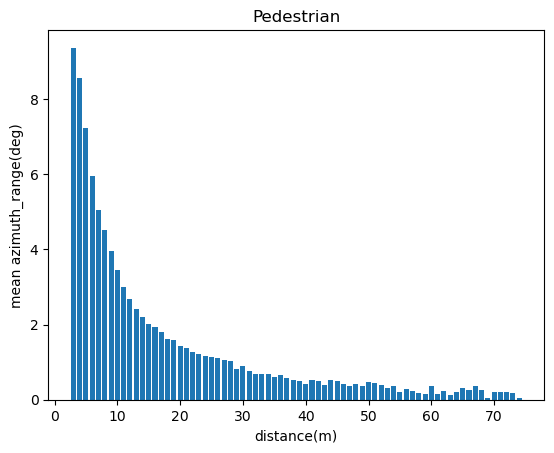

C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\740568791.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_each_distance_altitude = df_pedestrian.groupby(df_each_distance)["altitude_range"].mean()


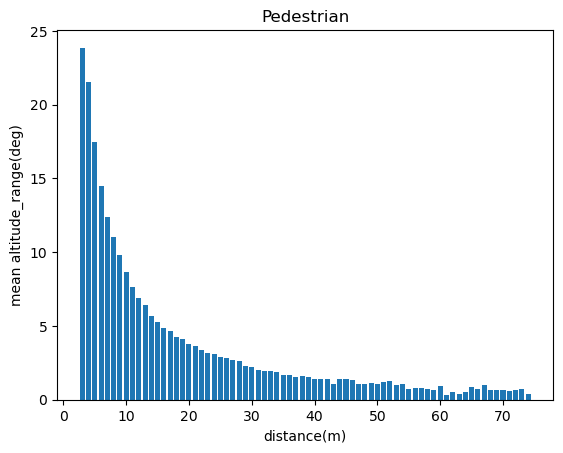

In [46]:
# Pedestrianについて、距離ごとのazimuth_rangeの平均を棒グラフで描く
df_pedestrian = df[df["type"] == "Pedestrian"]
df_pedestrian["azimuth_range"] = df_pedestrian["max_azimuth_deg"] - df_pedestrian["min_azimuth_deg"]
df_pedestrian["altitude_range"] = df_pedestrian["max_altitude_deg"] - df_pedestrian["min_altitude_deg"]

df_each_distance = pd.cut(df_pedestrian["distance_m"], bins=np.arange(0, 101, 1), right=False)
# binごとにazimuth_rangeの平均を取る
df_each_distance_azimuth = df_pedestrian.groupby(df_each_distance)["azimuth_range"].mean()
plt.bar(np.arange(0, 100, 1), df_each_distance_azimuth.values)
plt.xlabel("distance(m)")
plt.ylabel("mean azimuth_range(deg)")
plt.title("Pedestrian")
plt.show()

df_each_distance_altitude = df_pedestrian.groupby(df_each_distance)["altitude_range"].mean()
plt.bar(np.arange(0, 100, 1), df_each_distance_altitude.values)
plt.xlabel("distance(m)")
plt.ylabel("mean altitude_range(deg)")
plt.title("Pedestrian")
plt.show()

C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\543889984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle["azimuth_range"] = df_vehicle["max_azimuth_deg"] - df_vehicle["min_azimuth_deg"]
C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\543889984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle["altitude_range"] = df_vehicle["max_altitude_deg"] - df_vehicle["min_altitude_deg"]
C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\543889984.py:8: FutureWarning: The default of obser

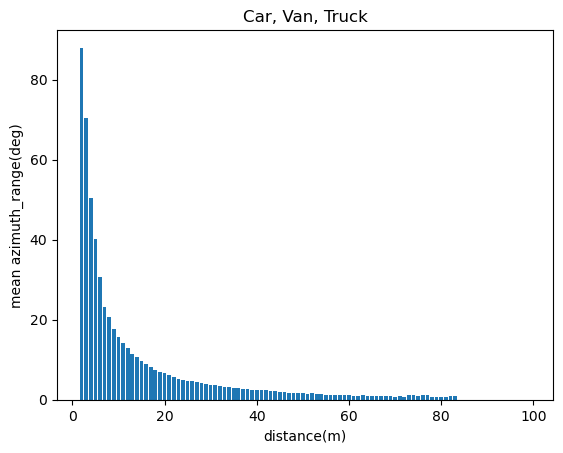

C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\543889984.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_each_distance_altitude = df_vehicle.groupby(df_each_distance)["altitude_range"].mean()


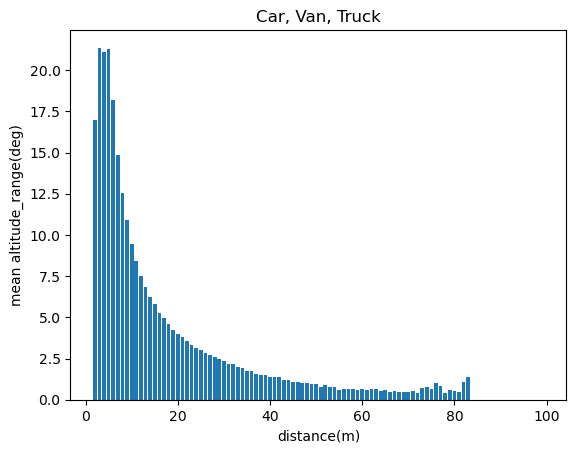

In [47]:
# Car, Van, Truckについて、距離ごとのazimuth_rangeの平均を棒グラフで描く
df_vehicle = df[df["type"].isin(["Car", "Van", "Truck"])]
df_vehicle["azimuth_range"] = df_vehicle["max_azimuth_deg"] - df_vehicle["min_azimuth_deg"]
df_vehicle["altitude_range"] = df_vehicle["max_altitude_deg"] - df_vehicle["min_altitude_deg"]

df_each_distance = pd.cut(df_vehicle["distance_m"], bins=np.arange(0, 101, 1), right=False)
# binごとにazimuth_rangeの平均を取る
df_each_distance_azimuth = df_vehicle.groupby(df_each_distance)["azimuth_range"].mean()
plt.bar(np.arange(0, 100, 1), df_each_distance_azimuth.values)
plt.xlabel("distance(m)")
plt.ylabel("mean azimuth_range(deg)")
plt.title("Car, Van, Truck")
plt.show()

df_each_distance_altitude = df_vehicle.groupby(df_each_distance)["altitude_range"].mean()
plt.bar(np.arange(0, 100, 1), df_each_distance_altitude.values)
plt.xlabel("distance(m)")
plt.ylabel("mean altitude_range(deg)")
plt.title("Car, Van, Truck")
plt.show()

C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\3530855746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pedestrian["azimuth_range"] = df_pedestrian["max_azimuth_deg"] - df_pedestrian["min_azimuth_deg"]
C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\3530855746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pedestrian["altitude_range"] = df_pedestrian["max_altitude_deg"] - df_pedestrian["min_altitude_deg"]
C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\3530855746.py:6: SettingWithCop

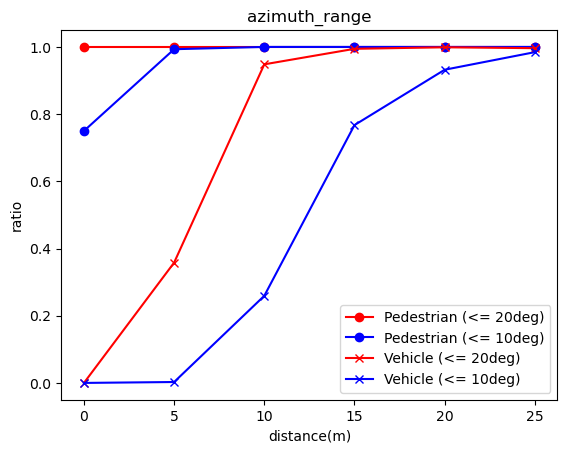

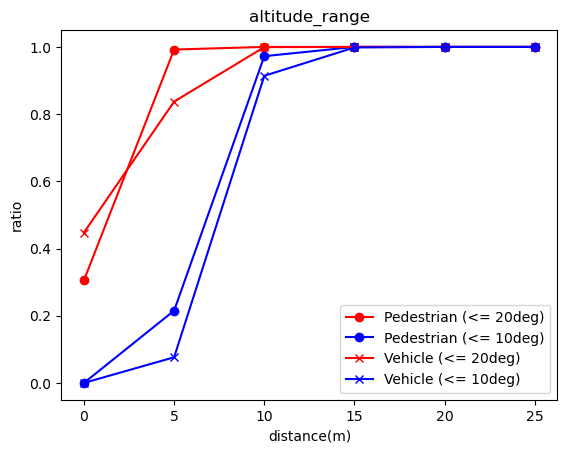

In [74]:
df_pedestrian = df[df["type"] == "Pedestrian"]
df_pedestrian["azimuth_range"] = df_pedestrian["max_azimuth_deg"] - df_pedestrian["min_azimuth_deg"]
df_pedestrian["altitude_range"] = df_pedestrian["max_altitude_deg"] - df_pedestrian["min_altitude_deg"]

df_vehicle = df[df["type"].isin(["Car", "Van", "Truck"])]
df_vehicle["azimuth_range"] = df_vehicle["max_azimuth_deg"] - df_vehicle["min_azimuth_deg"]
df_vehicle["altitude_range"] = df_vehicle["max_altitude_deg"] - df_vehicle["min_altitude_deg"]

bins = np.arange(0, 31, 5)
df_ped_dist = pd.cut(df_pedestrian["distance_m"], bins=bins, right=False)
df_vehicle_dist = pd.cut(df_vehicle["distance_m"], bins=bins, right=False)
df_ped_azi_group = df_pedestrian.groupby(df_ped_dist)["azimuth_range"]
df_vehicle_azi_group = df_vehicle.groupby(df_vehicle_dist)["azimuth_range"]
df_ped_alt_group = df_pedestrian.groupby(df_ped_dist)["altitude_range"]
df_vehicle_alt_group = df_vehicle.groupby(df_vehicle_dist)["altitude_range"]

df_ped_dist_azi_u20 = df_ped_azi_group.apply(lambda x: (x <= 20).sum() / x.count())
df_vehicle_dist_azi_u20 = df_vehicle_azi_group.apply(lambda x: (x <= 20).sum() / x.count())
df_ped_dist_alt_u20 = df_ped_alt_group.apply(lambda x: (x <= 20).sum() / x.count())
df_vehicle_dist_alt_u20 = df_vehicle_alt_group.apply(lambda x: (x <= 20).sum() / x.count())

df_ped_dist_azi_u10 = df_ped_azi_group.apply(lambda x: (x <= 10).sum() / x.count())
df_vehicle_dist_azi_u10 = df_vehicle_azi_group.apply(lambda x: (x <= 10).sum() / x.count())
df_ped_dist_alt_u10 = df_ped_alt_group.apply(lambda x: (x <= 10).sum() / x.count())
df_vehicle_dist_alt_u10 = df_vehicle_alt_group.apply(lambda x: (x <= 10).sum() / x.count())

plt.plot(bins[:-1], df_ped_dist_azi_u20.values, marker="o", color="red", label="Pedestrian (<= 20deg)")
plt.plot(bins[:-1], df_ped_dist_azi_u10.values, marker="o", color="blue", label="Pedestrian (<= 10deg)")
plt.plot(bins[:-1], df_vehicle_dist_azi_u20.values, marker="x", color="red", label="Vehicle (<= 20deg)")
plt.plot(bins[:-1], df_vehicle_dist_azi_u10.values, marker="x", color="blue", label="Vehicle (<= 10deg)")
plt.xlabel("distance(m)")
plt.ylabel("ratio")
plt.title("azimuth_range")
plt.legend()
plt.savefig("azimuth_range.svg", bbox_inches="tight", pad_inches=0.05, transparent=True, dpi=300)
plt.show()

plt.plot(bins[:-1], df_ped_dist_alt_u20.values, marker="o", color="red", label="Pedestrian (<= 20deg)")
plt.plot(bins[:-1], df_ped_dist_alt_u10.values, marker="o", color="blue", label="Pedestrian (<= 10deg)")
plt.plot(bins[:-1], df_vehicle_dist_alt_u20.values, marker="x", color="red", label="Vehicle (<= 20deg)")
plt.plot(bins[:-1], df_vehicle_dist_alt_u10.values, marker="x", color="blue", label="Vehicle (<= 10deg)")
plt.xlabel("distance(m)")
plt.ylabel("ratio")
plt.title("altitude_range")
plt.legend()
plt.savefig("altitude_range.svg", bbox_inches="tight", pad_inches=0.05, transparent=True, dpi=300)
plt.show()

C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\4201619344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pedestrian["azimuth_range"] = df_pedestrian["max_azimuth_deg"] - df_pedestrian["min_azimuth_deg"]
C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\4201619344.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pedestrian["altitude_range"] = df_pedestrian["max_altitude_deg"] - df_pedestrian["min_altitude_deg"]
C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\4201619344.py:8: FutureWarning:

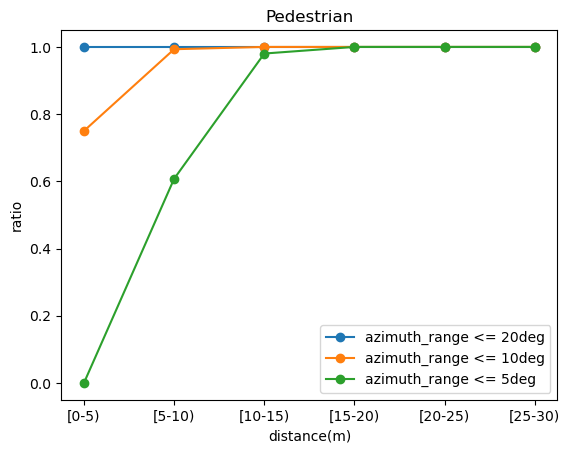

In [68]:
# Pedestrianについて、距離ごとのazimuth_rangeがN度以下の割合を棒グラフで描く
df_pedestrian = df[df["type"] == "Pedestrian"]
df_pedestrian["azimuth_range"] = df_pedestrian["max_azimuth_deg"] - df_pedestrian["min_azimuth_deg"]
df_pedestrian["altitude_range"] = df_pedestrian["max_altitude_deg"] - df_pedestrian["min_altitude_deg"]

bins = np.arange(0, 31, 5)
df_each_distance = pd.cut(df_pedestrian["distance_m"], bins=bins, right=False)
azi_group = df_pedestrian.groupby(df_each_distance)["azimuth_range"]
df_each_distance_azi_u20 = azi_group.apply(lambda x: (x <= 20).sum() / x.count())
df_each_distance_azi_u10 = azi_group.apply(lambda x: (x <= 10).sum() / x.count())
df_each_distance_azi_u5 = azi_group.apply(lambda x: (x <= 5).sum() / x.count())
plt.plot(bins[:-1], df_each_distance_azi_u20.values, marker="o", label="azimuth_range <= 20deg")
plt.plot(bins[:-1], df_each_distance_azi_u10.values, marker="o", label="azimuth_range <= 10deg")
plt.plot(bins[:-1], df_each_distance_azi_u5.values, marker="o", label="azimuth_range <= 5deg")
plt.xlabel("distance(m)")
plt.ylabel("ratio")
plt.title("Pedestrian")
plt.xticks(bins[:-1], [f"[{i}-{i+5})" for i in bins[:-1]])
plt.legend()
plt.show()

C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\3048266312.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alt_group = df_pedestrian.groupby(df_each_distance)["altitude_range"]
C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\3048266312.py:5: RuntimeWarning: invalid value encountered in scalar divide
  df_each_distance_alt_u20 = alt_group.apply(lambda x: (x <= 20).sum() / x.count())
C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\3048266312.py:6: RuntimeWarning: invalid value encountered in scalar divide
  df_each_distance_alt_u10 = alt_group.apply(lambda x: (x <= 10).sum() / x.count())
C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\3048266312.py:7: RuntimeWarning: invalid value encountered in scalar divide
  df_each_distance_alt_u5 = alt_group.apply(lambda x: (x <= 5).sum() / x.count(

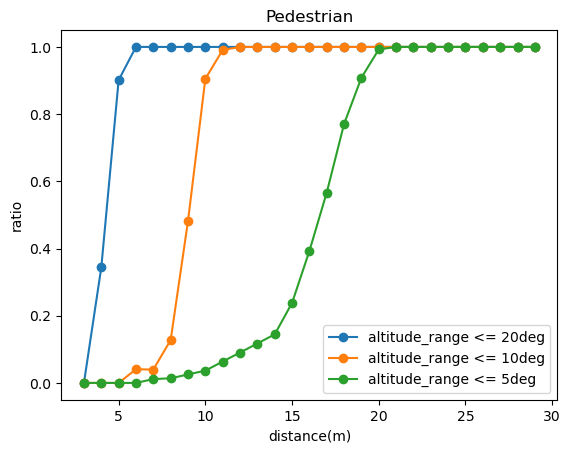

In [60]:
# Pedestrianについて、距離ごとのaltitude_rangeがN度以下の割合をグラフで描く
bins = np.arange(0, 31, 1)
df_each_distance = pd.cut(df_pedestrian["distance_m"], bins=bins, right=False)
alt_group = df_pedestrian.groupby(df_each_distance)["altitude_range"]
df_each_distance_alt_u20 = alt_group.apply(lambda x: (x <= 20).sum() / x.count())
df_each_distance_alt_u10 = alt_group.apply(lambda x: (x <= 10).sum() / x.count())
df_each_distance_alt_u5 = alt_group.apply(lambda x: (x <= 5).sum() / x.count())
plt.plot(bins[:-1], df_each_distance_alt_u20.values, marker="o", label="altitude_range <= 20deg")
plt.plot(bins[:-1], df_each_distance_alt_u10.values, marker="o", label="altitude_range <= 10deg")
plt.plot(bins[:-1], df_each_distance_alt_u5.values, marker="o", label="altitude_range <= 5deg")
plt.xlabel("distance(m)")
plt.ylabel("ratio")
plt.title("Pedestrian")
plt.legend()
plt.show()

C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\4011409848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle["azimuth_range"] = df_vehicle["max_azimuth_deg"] - df_vehicle["min_azimuth_deg"]
C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\4011409848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle["altitude_range"] = df_vehicle["max_altitude_deg"] - df_vehicle["min_altitude_deg"]
C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\4011409848.py:8: FutureWarning: The default of ob

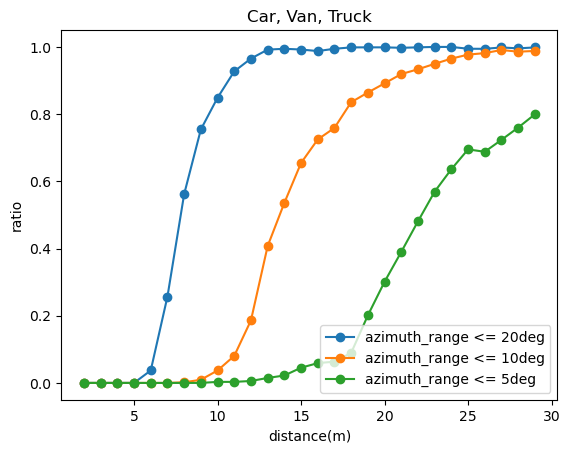

In [62]:
# Vehicleについて、距離ごとのazimuth_rangeがN度以下の割合をグラフで描く
df_vehicle = df[df["type"].isin(["Car", "Van", "Truck"])]
df_vehicle["azimuth_range"] = df_vehicle["max_azimuth_deg"] - df_vehicle["min_azimuth_deg"]
df_vehicle["altitude_range"] = df_vehicle["max_altitude_deg"] - df_vehicle["min_altitude_deg"]

bins = np.arange(0, 31, 1)
df_each_distance = pd.cut(df_vehicle["distance_m"], bins=bins, right=False)
azi_group = df_vehicle.groupby(df_each_distance)["azimuth_range"]
df_each_distance_azi_u20 = azi_group.apply(lambda x: (x <= 20).sum() / x.count())
df_each_distance_azi_u10 = azi_group.apply(lambda x: (x <= 10).sum() / x.count())
df_each_distance_azi_u5 = azi_group.apply(lambda x: (x <= 5).sum() / x.count())
plt.plot(bins[:-1], df_each_distance_azi_u20.values, marker="o", label="azimuth_range <= 20deg")
plt.plot(bins[:-1], df_each_distance_azi_u10.values, marker="o", label="azimuth_range <= 10deg")
plt.plot(bins[:-1], df_each_distance_azi_u5.values, marker="o", label="azimuth_range <= 5deg")
plt.xlabel("distance(m)")
plt.ylabel("ratio")
plt.title("Car, Van, Truck")
plt.legend()

C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\3356719221.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alt_group = df_vehicle.groupby(df_each_distance)["altitude_range"]
C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\3356719221.py:5: RuntimeWarning: invalid value encountered in scalar divide
  df_each_distance_alt_u20 = alt_group.apply(lambda x: (x <= 20).sum() / x.count())
C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\3356719221.py:6: RuntimeWarning: invalid value encountered in scalar divide
  df_each_distance_alt_u10 = alt_group.apply(lambda x: (x <= 10).sum() / x.count())
C:\Users\hykwy\AppData\Local\Temp\ipykernel_23244\3356719221.py:7: RuntimeWarning: invalid value encountered in scalar divide
  df_each_distance_alt_u5 = alt_group.apply(lambda x: (x <= 5).sum() / x.count())


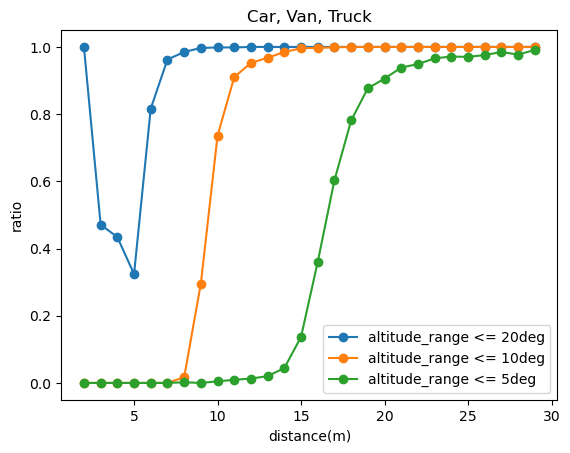

In [63]:
# Vehicleについて、距離ごとのaltitude_rangeがN度以下の割合をグラフで描く
bins = np.arange(0, 31, 1)
df_each_distance = pd.cut(df_vehicle["distance_m"], bins=bins, right=False)
alt_group = df_vehicle.groupby(df_each_distance)["altitude_range"]
df_each_distance_alt_u20 = alt_group.apply(lambda x: (x <= 20).sum() / x.count())
df_each_distance_alt_u10 = alt_group.apply(lambda x: (x <= 10).sum() / x.count())
df_each_distance_alt_u5 = alt_group.apply(lambda x: (x <= 5).sum() / x.count())
plt.plot(bins[:-1], df_each_distance_alt_u20.values, marker="o", label="altitude_range <= 20deg")
plt.plot(bins[:-1], df_each_distance_alt_u10.values, marker="o", label="altitude_range <= 10deg")
plt.plot(bins[:-1], df_each_distance_alt_u5.values, marker="o", label="altitude_range <= 5deg")
plt.xlabel("distance(m)")
plt.ylabel("ratio")
plt.title("Car, Van, Truck")
plt.legend()
plt.show()